In [175]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Union
from scipy.fft import fft, ifft, fftfreq

In [176]:
pattern_PbTe_10_10 = os.path.join('3-PbTe-thinfilm', 'PbTe', '10-10', '*.dat')
dat_files_list_PbTe_10_10 = glob.glob(pattern_PbTe_10_10, recursive=True)

pattern_substrato_10_10 = os.path.join('3-PbTe-thinfilm', 'substrato', '10-10', '*.dat')
dat_files_list_substrato_10_10 = glob.glob(pattern_substrato_10_10, recursive=True)

In [177]:
dict_with_all_dfs_PbTe_10_10 = {}
for path in dat_files_list_PbTe_10_10:
    df = pd.read_csv(path, sep="	")
    fname_split = path.split('\\')[3].split('__')
    temperature = int(fname_split[6][:-1])
    df_name = fname_split[0] + '_' + fname_split[6]
    dict_with_all_dfs_PbTe_10_10[df_name] = [df, temperature]

In [178]:
dict_with_all_dfs_substrato_10_10 = {}
for path in dat_files_list_substrato_10_10:
    df = pd.read_csv(path, sep="	")
    fname_split = path.split('\\')[3].split('__')
    temperature = int(fname_split[6][:-1])
    df_name = fname_split[0] + '_' + fname_split[6]
    dict_with_all_dfs_substrato_10_10[df_name] = [df, temperature]

In [179]:
temperatures = []
dict_with_mean_dfs_PbTe_10_10 = {}
id = 0
for key, df_list in dict_with_all_dfs_PbTe_10_10.items():
    if df_list[1] in temperatures:
        continue
    else:
        temperatures.append(df_list[1])
        df_temperature_list = [df_list[0] for key, df_list in dict_with_all_dfs_PbTe_10_10.items() if df_list[1] == temperatures[id]]
        mean_df = pd.concat(df_temperature_list).groupby('pos')['X'].mean().reset_index()
        dict_with_mean_dfs_PbTe_10_10[str(temperatures[id])+'K'] = [mean_df, temperatures[id]]
        id+=1

In [180]:
temperatures = []
dict_with_mean_dfs_substrato_10_10 = {}
id = 0
for key, df_list in dict_with_all_dfs_substrato_10_10.items():
    if df_list[1] in temperatures:
        continue
    else:
        temperatures.append(df_list[1])
        df_temperature_list = [df_list[0] for key, df_list in dict_with_all_dfs_substrato_10_10.items() if df_list[1] == temperatures[id]]
        mean_df = pd.concat(df_temperature_list).groupby('pos')['X'].mean().reset_index()
        dict_with_mean_dfs_substrato_10_10[str(temperatures[id])+'K'] = [mean_df, temperatures[id]]
        id+=1

In [181]:
c = 3e8 # meter per second
N = len(dict_with_mean_dfs_PbTe_10_10['300K'][0]['X'])
d_film = 0.0016e-3
n_sample = 2.56
print(f"c = {c:.1e} m/s \nN = {N} \nfilm thickness = {d_film*1e6:1.1f} um \nn_sample = {n_sample}")

c = 3.0e+08 m/s 
N = 601 
film thickness = 1.6 um 
n_sample = 2.56


In [182]:
# Making all df's have the same length

N_len_diff = dict_with_mean_dfs_substrato_10_10['300K'][0].shape[0] - dict_with_mean_dfs_PbTe_10_10['300K'][0].shape[0]
# print(N_len_diff)
for df in dict_with_mean_dfs_substrato_10_10.values():
    df[0] = df[0][(N_len_diff):].reset_index(drop=True)

In [183]:
print(dict_with_mean_dfs_substrato_10_10['300K'][0])

        pos             X
0    57.000 -2.273745e-13
1    57.005  1.136880e-13
2    57.010 -2.273755e-13
3    57.015 -6.821250e-13
4    57.020  2.273755e-13
..      ...           ...
596  59.980  1.932690e-12
597  59.985  1.136875e-13
598  59.990 -4.547495e-13
599  59.995 -1.705315e-12
600  60.000 -2.046370e-12

[601 rows x 2 columns]


In [184]:
# id_max_X = dict_with_mean_dfs_substrato_10_10['300K'][0]['X'].idxmax()
for df in dict_with_mean_dfs_substrato_10_10.values():
    df[0]['time_moment'] = (df[0]['pos']-df[0]['pos'][0])*2e-3/c

In [185]:
# id_max_X = dict_with_mean_dfs_PbTe_10_10['300K'][0]['X'].idxmax()
for df in dict_with_mean_dfs_PbTe_10_10.values():
    df[0]['time_moment'] = (df[0]['pos']-df[0]['pos'][0])*2e-3/c

In [186]:
print(dict_with_mean_dfs_substrato_10_10['300K'][0].shape)

(601, 3)


In [187]:
time_step = dict_with_mean_dfs_substrato_10_10['300K'][0]['time_moment'][1] - dict_with_mean_dfs_substrato_10_10['300K'][0]['time_moment'][0]
print(f"c = {c:.1e} m/s \nN = {N} \nfilm thickness = {d_film*1e6:1.1f} um \ntime step = {time_step*1e12:1.3f} ps")

c = 3.0e+08 m/s 
N = 601 
film thickness = 1.6 um 
time step = 0.033 ps


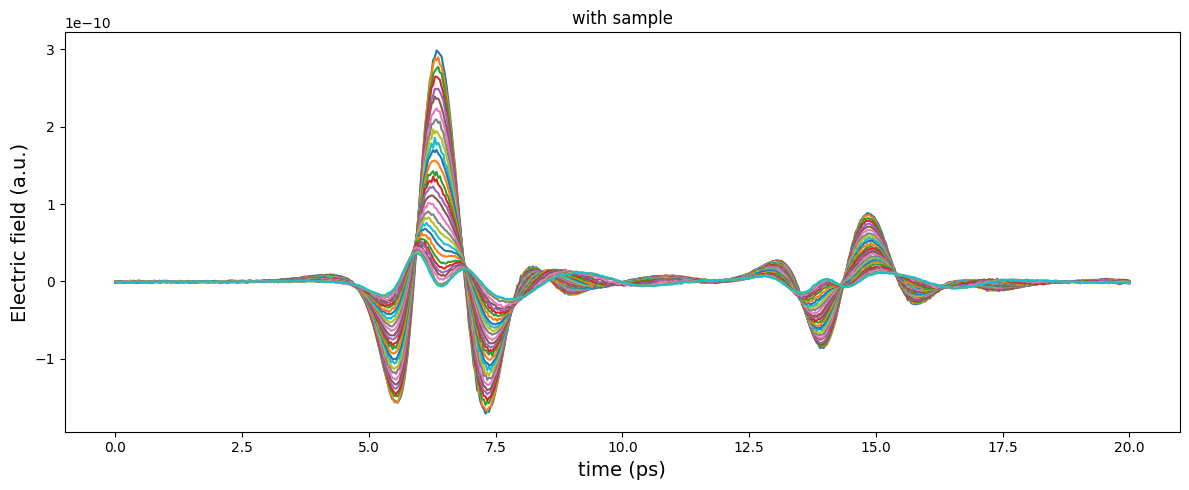

In [188]:
fig, ax = plt.subplots(figsize=(12, 5), tight_layout=True)
for df_name, df in dict_with_mean_dfs_PbTe_10_10.items():
    # if df[1]<200:
    #     continue
    ax.plot(df[0]['time_moment']*1e12, df[0]['X'])

ax.set_title('with sample')
ax.set_xlabel('time (ps)', fontsize=14)
ax.set_ylabel('Electric field (a.u.)',fontsize=14)

plt.show()

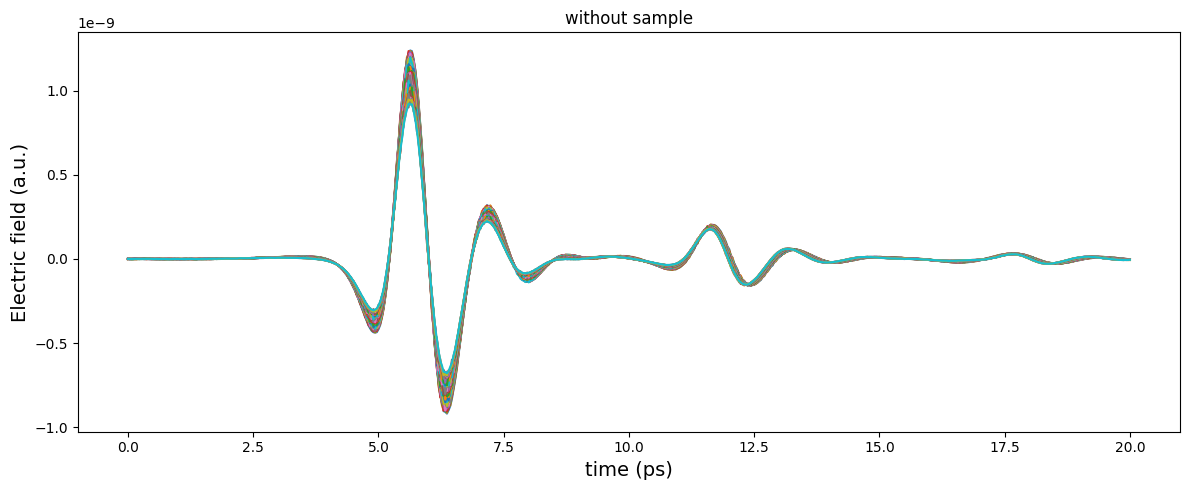

In [189]:
fig, ax = plt.subplots(figsize=(12, 5), tight_layout=True)
for df_name, df in dict_with_mean_dfs_substrato_10_10.items():
    ax.plot(df[0]['time_moment']*1e12, df[0]['X'])

ax.set_title('without sample')
ax.set_xlabel('time (ps)', fontsize=14)
ax.set_ylabel('Electric field (a.u.)',fontsize=14)

plt.show()

# Windowing

Windowing is a technique to mitigate artifacts produced by multiple reflections and limited time window. The simplest window is a rectangular one, which consists in truncating the data before the reflections. Since you're reducing the time window you'll have less data points, and hence you lose spectral resolution. To recover (and even enhance) the spectral resolution we can just add zeros after the truncation point (or at the beginning of the data), this technique is called **zero padding**. This truncation sometimes is sufficient to retrieve frequencies values, but it lacks of information about the spectral amplitude (see section 3.2 in this [paper](https://link.springer.com/article/10.1007/s10762-025-01092-2)), that's where other windows play a role. In this notebook I'll test some functions as windows (e.g. gaussian window), and how to implement in the code and data analysis.



In [ ]:
def apply_window(
    df_ref: pd.DataFrame,
    df_sample: pd.DataFrame,
    t_ref_refl: float,
    t_sample_refl: float,
    N_zero_padding: int,
    function: str,
    params: list,
    n_sub: Union[float, np.ndarray],
    delta_L: float,
    L: float
) -> np.ndarray: 
    """
    Processes THz-TDS data applying windowing and extracting the complex transmittance.

    The function performs zero-padding, aligns the main peaks of reference and sample
    pulses, applies a window function to filter reflections, and calculates the 
    complex transmittance transfer function via FFT.

    Parameters
    ----------
    df_ref : pd.DataFrame
        Reference pulse data. Must contain columns:
        - 'time_moment': Time in picoseconds (ps).
        - 'X': Electric field amplitude (a.u.).
    
    df_sample : pd.DataFrame
        Sample pulse data. Must contain columns:
        - 'time_moment': Time in picoseconds (ps).
        - 'X': Electric field amplitude (a.u.).

    t_ref_refl : float
        Time (ps) where the first reflection starts for the reference pulse.

    t_sample_refl : float
        Time (ps) where the first reflection starts for the sample pulse.

    N_zero_padding : int
        New array length after zero-padding (e.g., 4096).

    function : str
        Window type: 'gaussian' or 'flattop'.

    params : list of float
        Window parameters. 
        - If 'gaussian': [sigma].
        - If 'flattop': [width].

    n_sub : float or numpy.ndarray
        Refractive index of the substrate. Can be a single float value 
        (constant index) or an array (frequency-dependent index).

    delta_L : float
        Difference in thickness parameter (millimeters).

    L : float
        Sample thickness (millimeters).

    Returns
    -------
    freqs : numpy.ndarray
            The positive frequencies array.

    T : numpy.ndarray
        The complex transmittance array (frequency domain).
        Note that this array corresponds to the positive frequencies calculated
        by the FFT.
    
    See Also
    --------
    scipy.fft.fft : The function used for the Fourier Transform.
    """
    #copy to not change original dataframes
    ref_df = df_ref.copy()
    sample_df = df_sample.copy()

    # Calculate time step and dataframe lengths
    t_ref_refl = t_ref_refl*1e-12
    t_sample_refl = t_sample_refl*1e-12
    time_step = ref_df['time_moment'][1] - ref_df['time_moment'][0]
    N_ref = ref_df.shape[0]
    N_sample = sample_df.shape[0]
    pulse_duration = sample_df['time_moment'][N_ref-1]
    c = 299792458 # m/s

    # Pulse Truncation
    idx_ref_trunc = np.argmin(np.abs(ref_df['time_moment'] - t_ref_refl))
    ref_df_trunc = ref_df.loc[0:idx_ref_trunc].copy()
    idx_sample_trunc = np.argmin(np.abs(sample_df['time_moment'] - t_sample_refl))
    sample_df_trunc = sample_df.loc[0:idx_sample_trunc].copy()

    # If dataframes lengths are different, use zero padding to make N_sample = N_ref
    if N_ref > N_sample:
        delta_N = N_ref - N_sample
        tf = sample_df['time_moment'][N_sample-1]
        zero_padding_length_mismatch = pd.DataFrame({'pos': np.zeros(delta_N), 'X': np.zeros(delta_N), 'time_moment': np.zeros(delta_N)})
        sample_df = pd.concat([zero_padding_length_mismatch, sample_df], ignore_index=True)
        N = N_sample + delta_N
        sample_df['time_moment'] = np.linspace(0, time_step * (N-1), N)
    elif N_sample > N_ref:
        delta_N = N_sample - N_ref
        tf = ref_df['time_moment'][N_ref-1]
        zero_padding_length_mismatch = pd.DataFrame({'pos': np.zeros(delta_N), 'X': np.zeros(delta_N), 'time_moment': np.zeros(delta_N)})
        ref_df = pd.concat([zero_padding_length_mismatch, ref_df], ignore_index=True)
        N = N_ref + delta_N
        ref_df['time_moment'] = np.linspace(0, time_step * (N-1), N)
    else:
        N = N_sample

    # with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    #     print(sample_df)
    #     print(ref_df)

    # Zero padding
    N_orig = len(ref_df)
    new_center_index = N_zero_padding // 2 
    t_peak_ref_id_zp = ref_df['X'].idxmax()
    pad_left = new_center_index - t_peak_ref_id_zp
    pad_right = N_zero_padding - (N_orig + pad_left)
    start_time_index = -pad_left
    new_time_array = np.arange(start_time_index, start_time_index + N_zero_padding) * time_step
    sample_df = pd.DataFrame({
        'time_moment': new_time_array, 
        'X': np.pad(sample_df['X'], (pad_left, pad_right), mode='constant')
    })
    
    ref_df = pd.DataFrame({
        'time_moment': new_time_array, 
        'X': np.pad(ref_df['X'], (pad_left, pad_right), mode='constant')
    })
    N = N_zero_padding

    # Zero padding for truncated pulses
    new_center_index = N_zero_padding // 2 
    t_peak_ref_trunc_id_zp = ref_df_trunc['X'].idxmax()
    pad_left = new_center_index - t_peak_ref_trunc_id_zp
    pad_right_ref = N_zero_padding - (len(ref_df_trunc) + pad_left)
    pad_right_sample = N_zero_padding - (len(sample_df_trunc) + pad_left)
    start_time_index = -pad_left
    new_time_array = np.arange(start_time_index, start_time_index + N_zero_padding) * time_step
    sample_df_trunc = pd.DataFrame({
        'time_moment': new_time_array, 
        'X': np.pad(sample_df_trunc['X'], (pad_left, pad_right_sample), mode='constant')
    })
    
    ref_df_trunc = pd.DataFrame({
        'time_moment': new_time_array, 
        'X': np.pad(ref_df_trunc['X'], (pad_left, pad_right_ref), mode='constant')
    })

    # with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    #     print(sample_df.shape)
    #     print(sample_df)

    # Find time moment for main pulse and reflection peaks after zero padding
    t_peak_sample_id = sample_df['X'].idxmax()
    t_peak_ref_id = ref_df['X'].idxmax()
    t_peak_ref = ref_df['time_moment'][t_peak_ref_id]
    t_peak_sample = sample_df['time_moment'][t_peak_sample_id]

    print(f"max t sample id {t_peak_sample_id} \nmax t ref id {t_peak_ref_id}")

    # Amplitude normalization factors
    peak_max_ref = ref_df['X'][t_peak_ref_id]
    peak_max_sample = sample_df['X'][t_peak_sample_id]

    # Plotting peaks before alignment
    fig, ax = plt.subplots(figsize=(10, 4), tight_layout=True)
    ax.plot(ref_df['time_moment']*1e12, ref_df['X']/peak_max_ref+3, 'r')
    ax.plot(sample_df['time_moment']*1e12, sample_df['X']/peak_max_sample, 'b')
    ax.annotate(
    r'$t_{ref}^{refl}$',
    xy=(t_ref_refl*1e12, 3.05),
    xytext=(t_ref_refl*1e12, 3.7),
    fontsize=12,
    arrowprops=dict(
        facecolor='red',
        width=2,
        shrink=0.05,
        headwidth=4,
        headlength=6
    )
    )
    ax.annotate(
    r'$t_{sam}^{refl}$',
    xy=(t_sample_refl*1e12, 0.1),
    xytext=(t_sample_refl*1e12, 0.8),
    fontsize=12,
    arrowprops=dict(
        facecolor='blue',
        width=2,
        shrink=0.05,
        headwidth=4,
        headlength=6
    )
    )
    ax.set_xlabel('Time (ps)', fontsize=14)
    ax.set_ylabel('Electric Field (a.u.)', fontsize=14)
    ax.legend(['reference', 'sample'], fontsize = 10)
    ax.set_title(r'$t_{ref}^{max}$'+ f'= {t_peak_ref*1e12:1.2f} ps' + '   '+ r'$t_{sam}^{max}$' + f'= {t_peak_sample*1e12: 1.2f} ps'+ '   '+ r'$t_{ref}^{refl}$' + f'= {t_ref_refl*1e12: 1.2f} ps'+ '   '+ r'$t_{sam}^{refl}$' + f'= {t_sample_refl*1e12: 1.2f} ps', fontsize=14)
    # ax.set_xticks(np.arange(0, 21, 1))
    ax.set_ylim((-1, 4.25))
    ax.set_xlim((0, pulse_duration*1e12))

    # Plotting inset
    t_ref_refl_id = (ref_df['time_moment'][ref_df['time_moment'] - t_ref_refl < time_step/2]).idxmax()
    t_sample_refl_id = (sample_df['time_moment'][sample_df['time_moment'] - t_sample_refl < time_step/2]).idxmax()
    print(t_ref_refl_id)
    axins = ax.inset_axes([0.67, 0.43, 0.3, 0.25])
    axins.plot(ref_df['time_moment'][(t_ref_refl_id-30):t_ref_refl_id+1]*1e12 - t_ref_refl*1e12, ref_df['X'][(t_ref_refl_id-30):t_ref_refl_id+1] / peak_max_ref, 'r')
    axins.plot(sample_df['time_moment'][(t_sample_refl_id-30):t_sample_refl_id+1]*1e12 - t_sample_refl*1e12, sample_df['X'][(t_sample_refl_id-30):t_sample_refl_id+1] / peak_max_sample, 'b')
    axins.set_xlabel(r'$t - t^{ref}$ (ps)')
    # axins.set_xlim((-1,0))

    # Aligning peaks
    delta_t_max_id = t_peak_ref_id - t_peak_sample_id
    delta_t_max = t_peak_ref - t_peak_sample
    sample_df['time_moment'] = sample_df['time_moment'] + delta_t_max
    sample_df_trunc['time_moment'] = sample_df_trunc['time_moment'] + delta_t_max

    # Plotting aligned peaks
    fig2, ax2 = plt.subplots(figsize=(10, 4), tight_layout=True)
    ax2.plot(ref_df['time_moment']*1e12, ref_df['X'] / peak_max_ref, 'r')
    ax2.plot(sample_df['time_moment']*1e12, sample_df['X'] / peak_max_sample, 'b')
    ax2.set_xlabel('Time (ps)', fontsize = 14)
    ax2.set_ylabel('Electric Field (a.u.)', fontsize = 14)
    ax2.legend(['reference', 'sample'], fontsize = 10)
    ax2.set_xticks(np.arange(0, 21, 1))
    ax2.set_xlim((0, pulse_duration*1e12))

    # Plotting truncated pulses
    fig9, ax9 = plt.subplots(figsize=(10, 4), tight_layout=True)
    ax9.plot(ref_df_trunc['time_moment']*1e12, ref_df_trunc['X'] / peak_max_ref, 'r')
    ax9.plot(sample_df_trunc['time_moment']*1e12, sample_df_trunc['X'] / peak_max_sample, 'b')
    ax9.set_xlabel('Time (ps)', fontsize = 14)
    ax9.set_ylabel('Electric Field (a.u.)', fontsize = 14)
    ax9.legend(['reference', 'sample'], fontsize = 10)
    ax9.set_xticks(np.arange(0, 21, 1))
    ax9.set_xlim((0, pulse_duration*1e12))

    # Plotting inset with truncated pulses
    t_ref_refl_id = (ref_df_trunc['time_moment'][ref_df_trunc['time_moment'] - t_ref_refl < time_step/2]).idxmax()
    t_sample_refl_id = (sample_df_trunc['time_moment'][sample_df_trunc['time_moment'] - (t_sample_refl+delta_t_max) < time_step/2]).idxmax()
    axins2 = ax9.inset_axes([0.55, 0.6, 0.43, 0.23])
    axins2.plot(ref_df_trunc['time_moment'][(t_ref_refl_id-30):t_ref_refl_id+1]*1e12 - t_ref_refl*1e12, ref_df_trunc['X'][(t_ref_refl_id-30):t_ref_refl_id+1] / peak_max_ref, 'r')
    axins2.plot(sample_df_trunc['time_moment'][(t_sample_refl_id-30):t_sample_refl_id+1]*1e12 - (t_sample_refl + delta_t_max)*1e12, sample_df_trunc['X'][(t_sample_refl_id-30):t_sample_refl_id+1] / peak_max_sample, 'b')
    axins2.set_xlabel(r'$t - t^{ref}$ (ps)')
    
    # Applying the window function
    if function == 'gaussian':
        params_gaussian = [t_peak_ref, params[0], peak_max_ref]
        time_column = sample_df['time_moment']
        window = _gaussian_window(time_column, *params_gaussian)

        # sample dataframe
        X_windowed_sample = sample_df['X'] * window
        sample_df_windowed = pd.DataFrame({'time_moment': time_column, 'X': X_windowed_sample})

        # reference dataframe
        X_windowed_ref = ref_df['X'] * window
        ref_df_windowed = pd.DataFrame({'time_moment': time_column, 'X': X_windowed_ref})

    if function == 'flattop':
        params_flattop = [t_peak_ref, params[0], peak_max_ref]
        time_column = sample_df['time_moment']
        window = _flattop_window(time_column, *params_flattop)

        # sample dataframe
        X_windowed_sample = sample_df['X'] * window
        sample_df_windowed = pd.DataFrame({'time_moment': time_column, 'X': X_windowed_sample})

        # reference dataframe
        X_windowed_ref = ref_df['X'] * window
        ref_df_windowed = pd.DataFrame({'time_moment': time_column, 'X': X_windowed_ref})

    # plotting windowed reference data
    fig, ax3 = plt.subplots(figsize = (10, 4), tight_layout = True)
    ax3.plot(time_column*1e12, ref_df['X'] / max(ref_df['X']) + 2, 'b')
    ax3.plot(time_column*1e12, window / max(window) + 2, 'k')
    ax3.plot(time_column*1e12, ref_df_windowed['X'] / max(ref_df_windowed['X']), 'b')
    ax3.set_xlabel('Time (ps)', fontsize=14)
    ax3.set_ylabel('Electric Field (a.u.)', fontsize=14)
    ax3.set_xlim((-pulse_duration*1e12 + 2*t_peak_ref*1e12, pulse_duration*1e12))

    # plotting windowed sample data
    fig, ax4 = plt.subplots(figsize = (10, 4), tight_layout = True)
    ax4.plot(time_column*1e12, sample_df['X'] / max(sample_df['X']) + 2, 'b')
    ax4.plot(time_column*1e12, window / max(window) + 2, 'k')
    ax4.plot(time_column*1e12, sample_df_windowed['X'] / max(sample_df_windowed['X']), 'b')
    ax4.set_xlabel('Time (ps)', fontsize=14)
    ax4.set_ylabel('Electric Field (a.u.)', fontsize=14)
    ax4.set_xlim((-pulse_duration*1e12 + 2*t_peak_ref*1e12, pulse_duration*1e12))

    # Calculating the FFTs
    freqs = fftfreq(N, time_step)[:N//2]
    sample_df_fft = np.conj(fft(sample_df_windowed['X']))[:N//2] #* np.exp(1j * 2 * np.pi * freqs * delta_t_max)
    ref_df_fft = np.conj(fft(ref_df_windowed['X']))[:N//2]
    sample_df_trunc_fft = np.conj(fft(sample_df_trunc['X']))[:N//2] #* np.exp(1j * 2 * np.pi * freqs * delta_t_max)
    ref_df_trunc_fft = np.conj(fft(ref_df_trunc['X']))[:N//2]
    print(max(abs(np.exp(1j * 2 * np.pi * freqs * delta_t_max))))

    # Plotting FFT
    max_freq_id = len(freqs[freqs < 1.5e12])
    fig, ax5 = plt.subplots(figsize = (10, 4), tight_layout=True)
    ax5.semilogy(freqs[:max_freq_id]*1e-12, np.abs(ref_df_fft[:max_freq_id]), 'r')
    ax5.semilogy(freqs[:max_freq_id]*1e-12, np.abs(sample_df_fft[:max_freq_id]), 'b')
    # ax5.semilogy(freqs[:max_freq_id]*1e-12, np.abs(ref_df_trunc_fft[:max_freq_id]), 'r-')
    # ax5.semilogy(freqs[:max_freq_id]*1e-12, np.abs(sample_df_trunc_fft[:max_freq_id]), 'b-')
    # ax5.legend(['Reference windowed', 'Sample windowed', 'Reference truncated', 'Sample truncated'])
    ax5.legend(['Reference windowed', 'Sample windowed'])
    ax5.set_xlabel('Frequency (THz)', fontsize = 14)
    ax5.set_ylabel('Amplitude (a.u.)', fontsize = 14)
    ax5.set_xlim((0.2, 1.5))
    ax5.set_xticks(np.arange(0.2, 1.5, 0.1))

    # Calculating the film transmittance
    T = (sample_df_fft / ref_df_fft) * np.exp(1j * 2 * np.pi * freqs * (1 - n_sub) * delta_L/c)
    T_trunc = (sample_df_trunc_fft / ref_df_trunc_fft) * np.exp(1j * 2 * np.pi * freqs * (1 - n_sub) * delta_L/c)
    # print(max(abs(np.exp(1j * 2 * np.pi * freqs * (1 - n_sub) * delta_L/c))))

    # Plotting the transmittance
    fig, ax6 = plt.subplots(figsize = (10, 4), tight_layout=True)
    ax6.semilogy(freqs[:max_freq_id]*1e-12, np.abs(T[:max_freq_id])**2, 'b')
    ax6.semilogy(freqs[:max_freq_id]*1e-12, np.abs(T_trunc[:max_freq_id])**2, 'r')
    ax6.set_xlabel('Frequency (THz)', fontsize = 14)
    ax6.set_ylabel('Transmittance', fontsize = 14)
    ax6.legend(['Windowed', 'Truncated'], fontsize = 10)
    ax6.set_xlim((0.2, 1.5))
    ax6.set_xticks(np.arange(0.2, 1.5, 0.1))

    # Calculating the complex permittivity
    e_film = 1j * (1 + n_sub) * ((1 / T[1:]) - 1) * c / (2 * np.pi * freqs[1:] * L) - n_sub
    e_film_trunc = 1j * (1 + n_sub) * ((1 / T_trunc[1:]) - 1) * c / (2 * np.pi * freqs[1:] * L) - n_sub

    # Plotting the permittivity real part
    fig, ax7 = plt.subplots(figsize = (10, 4), tight_layout=True)
    ax7.plot(freqs[:max_freq_id]*1e-12, np.real(e_film[:max_freq_id])/1e3, 'b')
    ax7.plot(freqs[:max_freq_id]*1e-12, np.real(e_film_trunc[:max_freq_id])/1e3, 'r')
    ax7.set_xlabel('Frequency (THz)', fontsize = 14)
    ax7.set_ylabel(r'$\epsilon_1$ ($10^3$)', fontsize = 14)
    ax7.legend(['Windowed', 'Truncated'], fontsize = 10)
    ax7.set_xlim((0.2, 1.5))
    ax7.set_xticks(np.arange(0.2, 1.5, 0.1))

    # Plotting the permittivity imaginary part
    fig, ax8 = plt.subplots(figsize = (10, 4), tight_layout=True)
    ax8.plot(freqs[:max_freq_id]*1e-12, np.imag(e_film[:max_freq_id])/1e3, 'b')
    ax8.plot(freqs[:max_freq_id]*1e-12, np.imag(e_film_trunc[:max_freq_id])/1e3, 'r')
    ax8.set_xlabel('Frequency (THz)', fontsize = 14)
    ax8.set_ylabel(r'$\epsilon_2$ ($10^3$)', fontsize = 14)
    ax8.legend(['Windowed', 'Truncated'], fontsize = 10)
    ax8.set_xlim((0.2, 1.5))
    ax8.set_xticks(np.arange(0.2, 1.5, 0.1))

    return freqs, T

def _gaussian_window(x, x_0, sigma, A):
    return A * np.exp(-(x - x_0)**2 / (2 * sigma**2))

max t sample id 2010 
max t ref id 2000
2132
1.0000000000000002


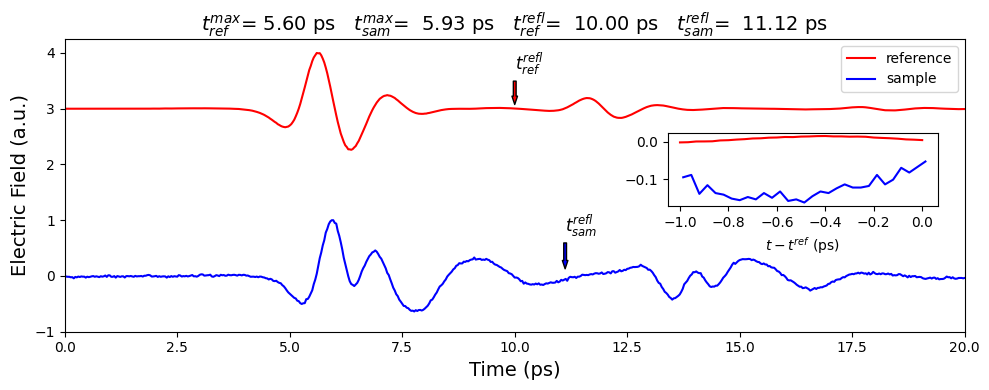

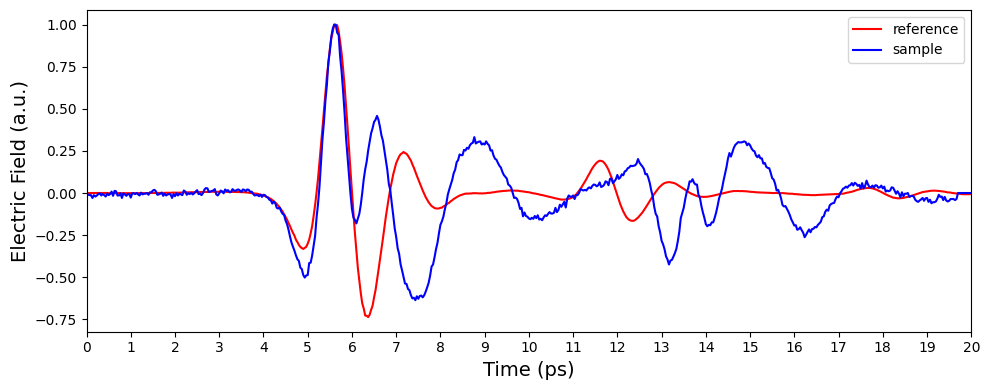

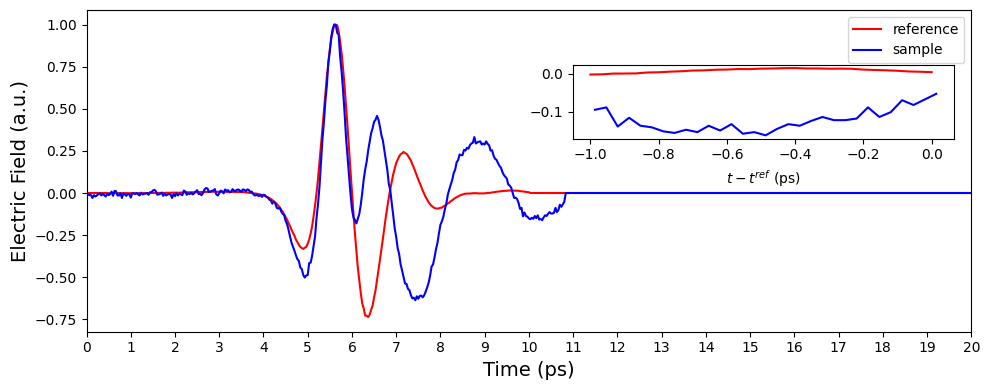

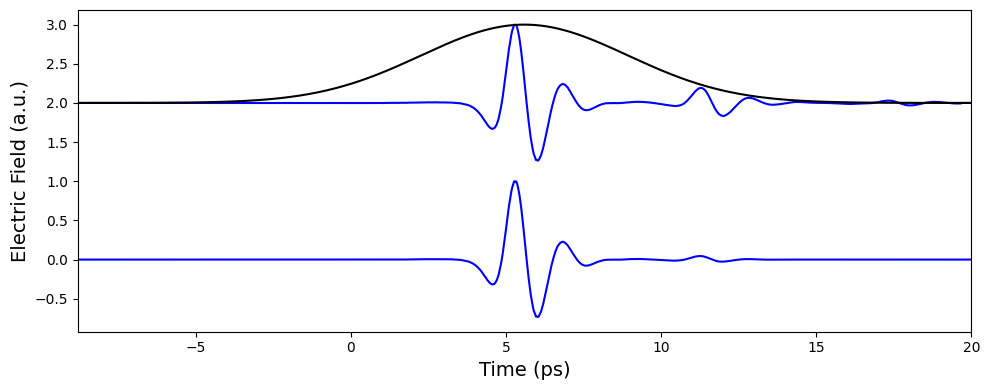

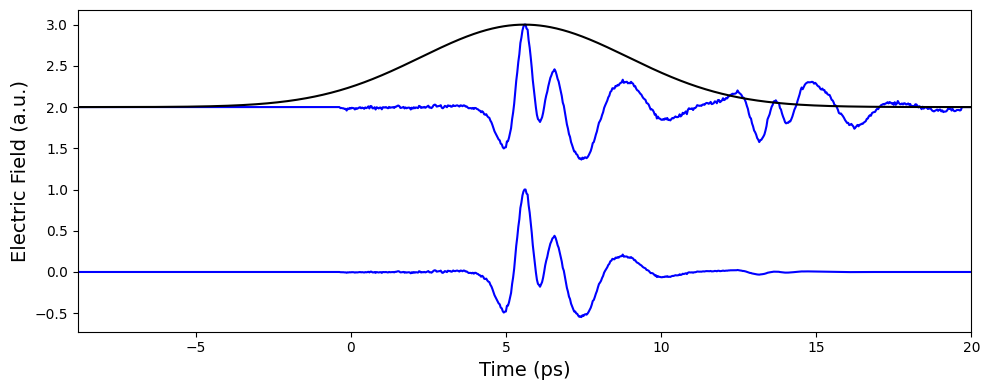

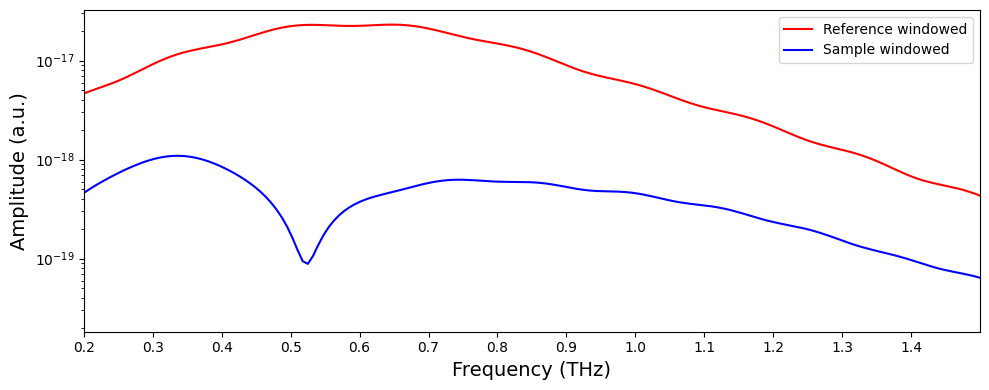

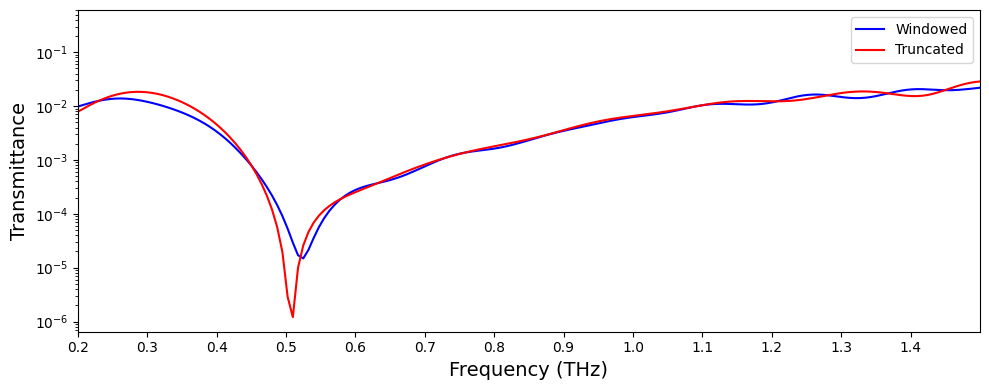

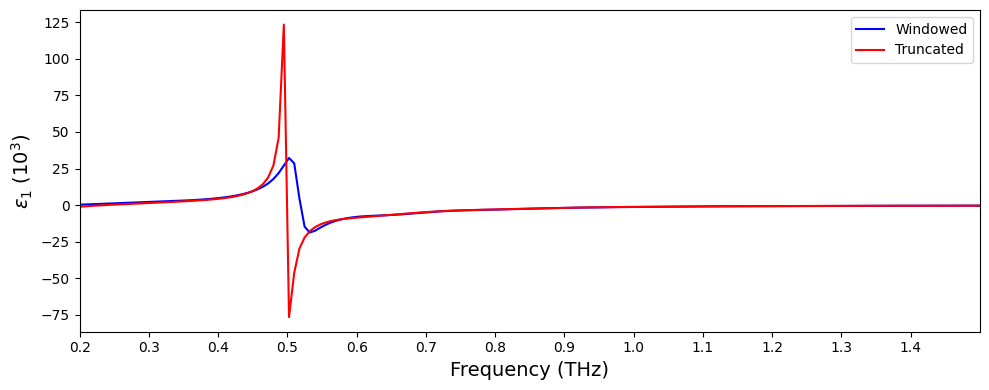

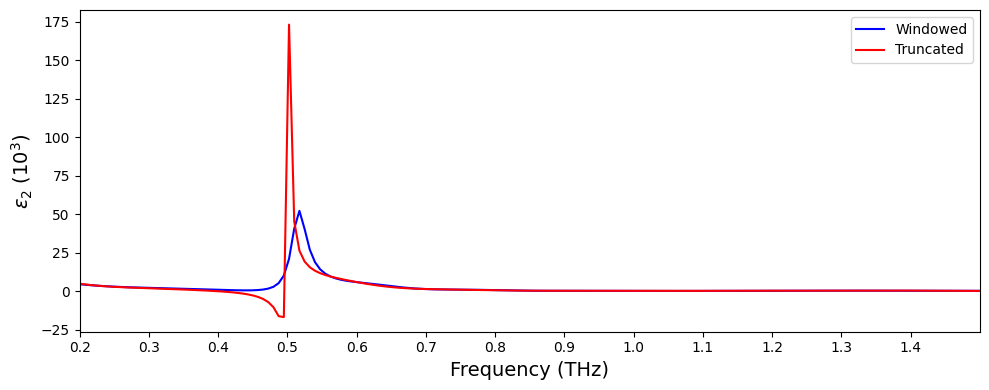

In [225]:
ref_df = dict_with_mean_dfs_substrato_10_10['10K'][0]
sample_df = dict_with_mean_dfs_PbTe_10_10['10K'][0]
tf = sample_df['time_moment'][600]

N_zero_padding = 1000
# sample_df = pd.DataFrame({'time_moment': np.arange(0, time_step * (N_zero_padding-1), time_step), 'X': pd.concat([sample_df['X'], pd.Series(0, index = range(N_zero_padding - N))])})
# print(len(pd.concat([sample_df['X'], pd.Series(0, index = range(N_zero_padding))])))
# print(len(sample_df))
# def gaussian_window(x, x_0, sigma, A):
#     return A * np.exp(-(x - x_0)**2 / (2 * sigma**2))
# params = [10e-12, 3e-12, 1e-10]
sigma = 100*time_step


freqs, T = apply_window(ref_df, sample_df, 10, 11.12, 4001, 'gaussian', [sigma], 2.56, 0.086*1e-3, 0.0016e-3)

In [192]:
# flattop window
def flattop_window(x, N):
    a_0 = 0.35875
    a_1 = 0.48829
    a_2 = 0.14128
    a_3 = 0.01168
    pi = np.pi
    # flattop = a_0 - a_1 * np.cos(2 * pi * x / N) + a_2 * np.cos(4 * pi * x / N) - a_3 * np.cos(6 * pi * x / N)
    return a_0 + a_1 + a_2 + a_3
print(flattop_window(8, 16))

1.0
